**Análise de Dados Agrícolas e Predição de Fertilizantes**

Neste notebook, realizaremos uma análise exploratória dos dados agrícolas, visualizações e construção de modelos preditivos para determinar o tipo de cultura baseado nas condições de solo e clima. Além disso, vamos analisar os perfis ideais de solo e clima para diferentes culturas e fertilizantes.

**Bibliotecas Necessárias**

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler

**Carregamento dos Dados**

 Nesta seção, carregamos os conjuntos de dados de produtos agrícolas e de previsão de fertilizantes

In [6]:
data = pd.read_csv('Atividade_Cap_14_produtos_agricolas.csv')
fertilizer_data = pd.read_csv('HTML_Cap_14_fertilizer_prediction.csv')

**Análise Exploratória Inicial**

Abaixo, visualizamos as primeiras linhas, as estatísticas descritivas e verificamos a existência de valores nulos

In [7]:
print("Visualização das primeiras linhas do dataset:")
print(data.head())

print("\nEstatísticas descritivas do dataset:")
print(data.describe())

print("\nVerificação de valores nulos em cada coluna:")
print(data.isnull().sum())

Visualização das primeiras linhas do dataset:
    N   P   K  temperature   humidity        ph    rainfall label
0  90  42  43    20.879744  82.002744  6.502985  202.935536  rice
1  85  58  41    21.770462  80.319644  7.038096  226.655537  rice
2  60  55  44    23.004459  82.320763  7.840207  263.964248  rice
3  74  35  40    26.491096  80.158363  6.980401  242.864034  rice
4  78  42  42    20.130175  81.604873  7.628473  262.717340  rice

Estatísticas descritivas do dataset:
                 N            P            K  temperature     humidity  \
count  2200.000000  2200.000000  2200.000000  2200.000000  2200.000000   
mean     50.551818    53.362727    48.149091    25.616244    71.481779   
std      36.917334    32.985883    50.647931     5.063749    22.263812   
min       0.000000     5.000000     5.000000     8.825675    14.258040   
25%      21.000000    28.000000    20.000000    22.769375    60.261953   
50%      37.000000    51.000000    32.000000    25.598693    80.473146   
75

**Visualização: Histograma das Variáveis**

Geramos histogramas para entender a distribuição de cada variável do conjunto de dados

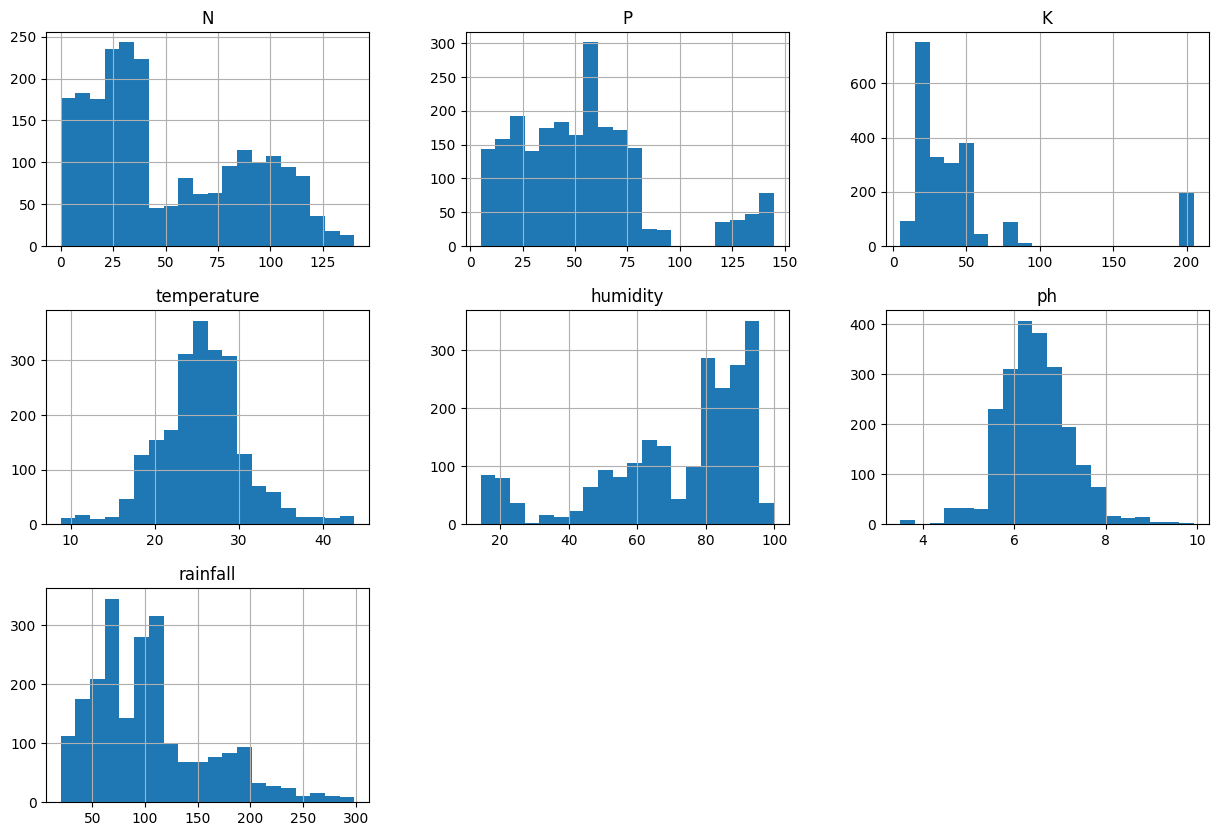

In [8]:
data.hist(bins=20, figsize=(15, 10))
plt.show()


**Análise de Correlações**

Calculamos a matriz de correlação das variáveis numéricas e exibimos como um mapa de calor para melhor compreensão

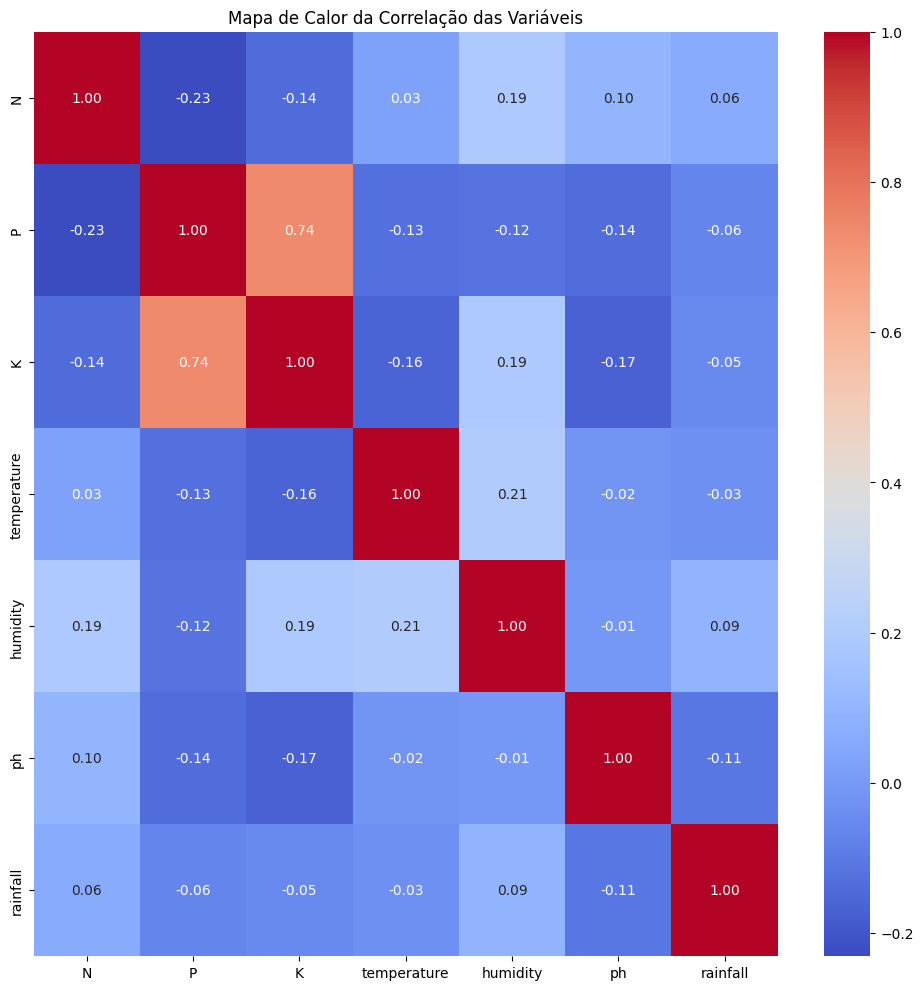

In [9]:
numerical_data = data.select_dtypes(include=[np.number])
corr = numerical_data.corr()

plt.figure(figsize=(12, 12))
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Mapa de Calor da Correlação das Variáveis')
plt.show()


**nálise dos Perfis das Culturas: Boxplots**

Comparamos as variáveis de solo e clima (como N, P, K, temperatura, umidade, ph, e precipitação) com o tipo de cultura usando boxplots

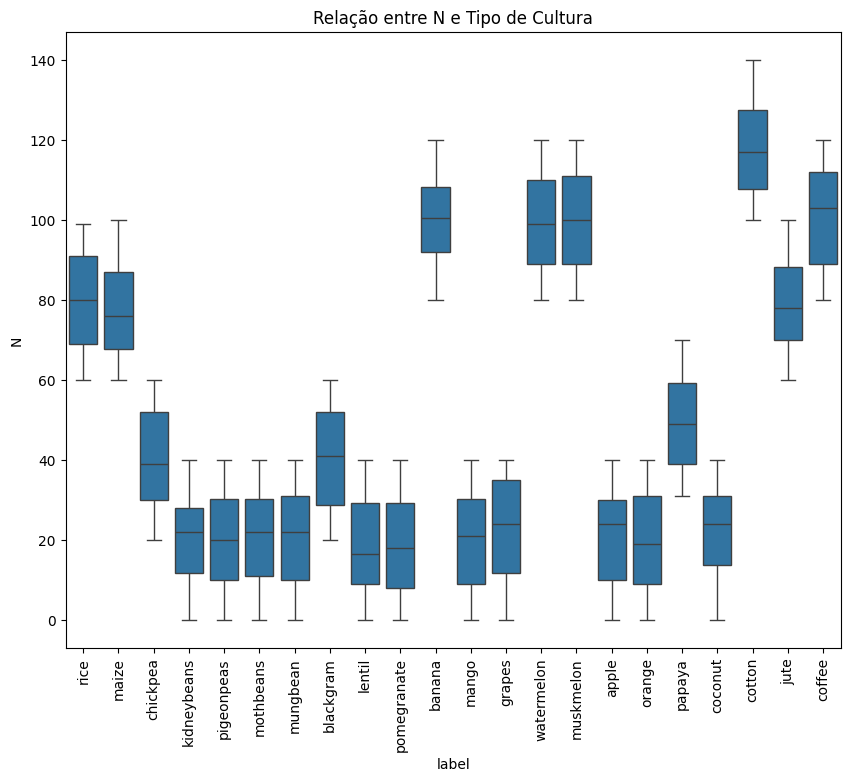

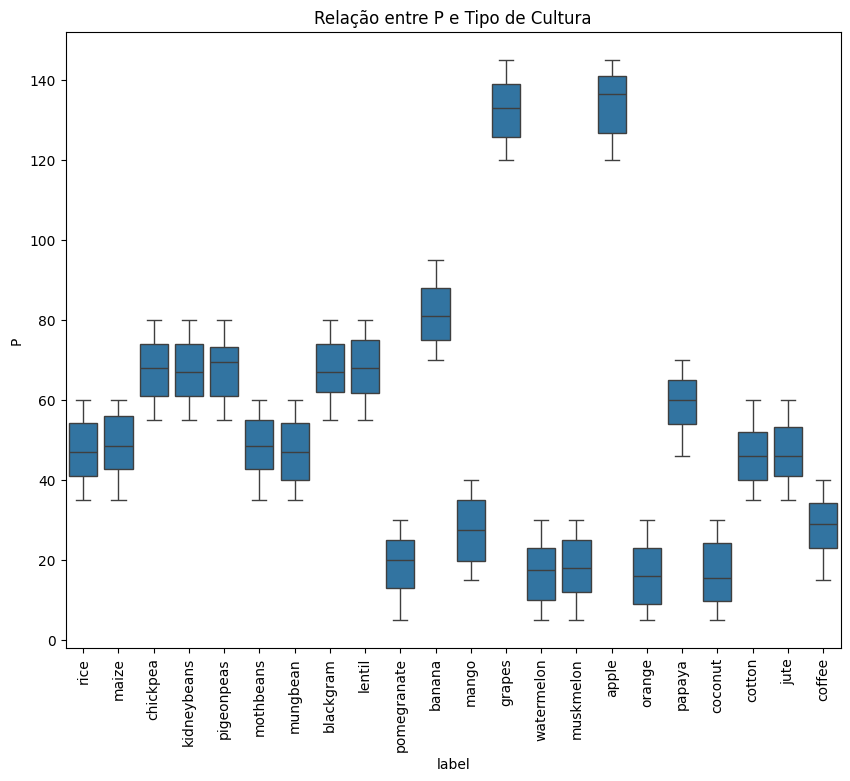

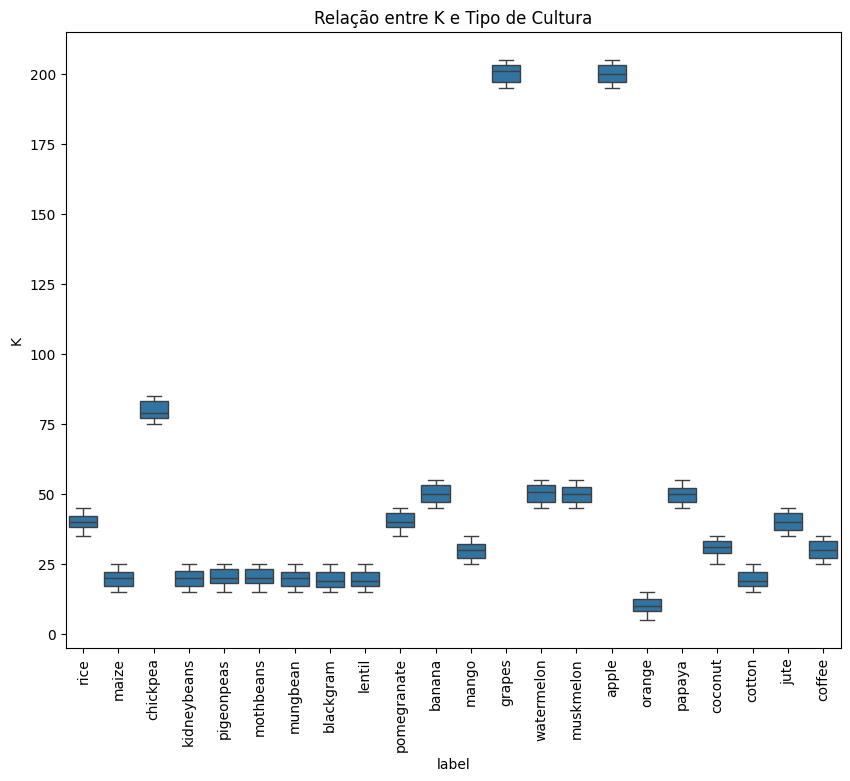

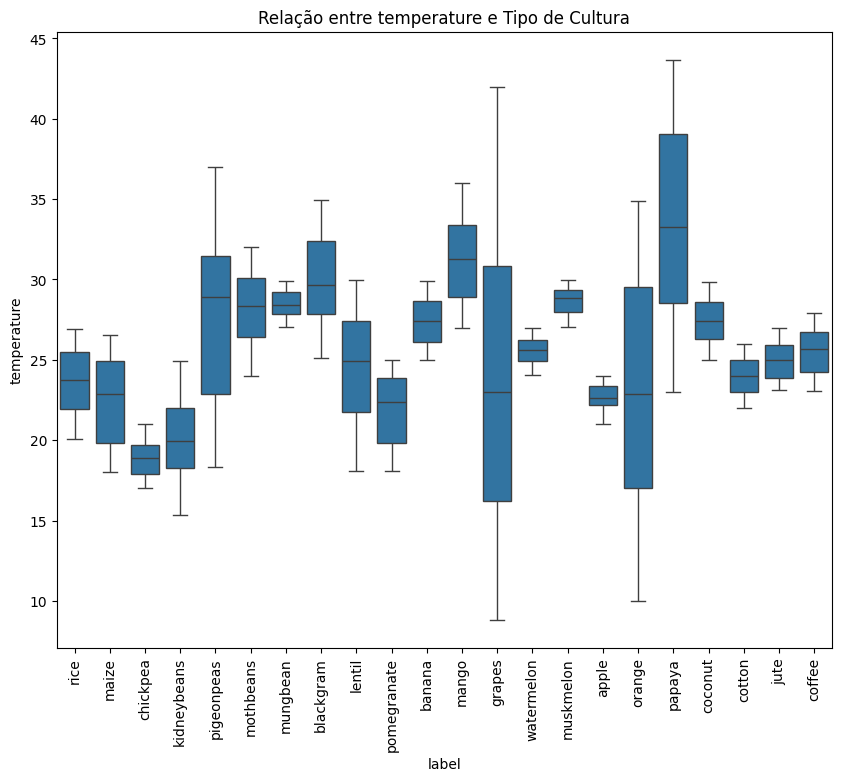

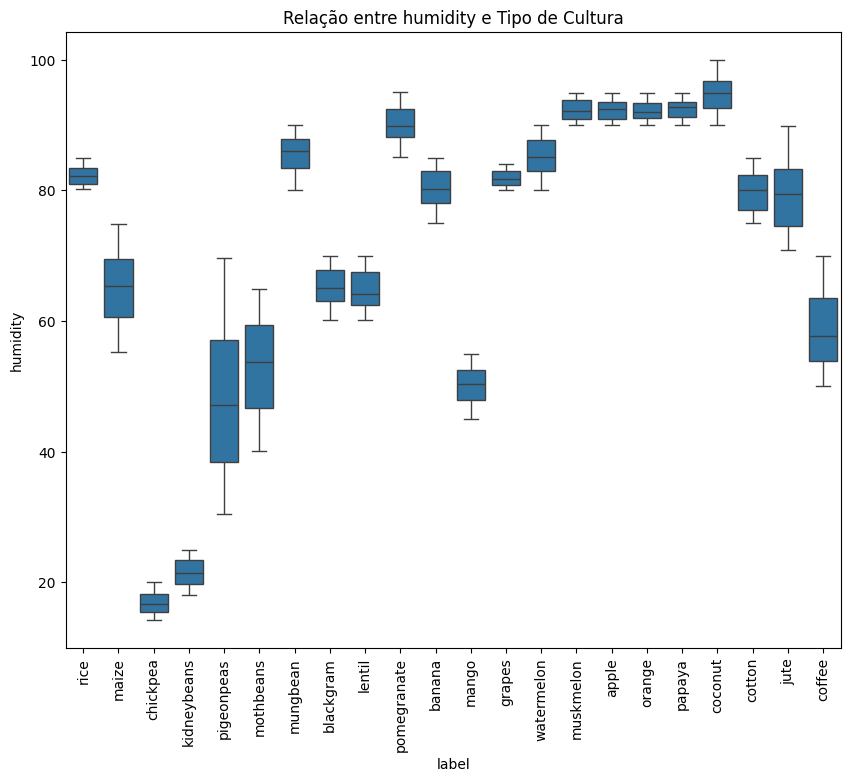

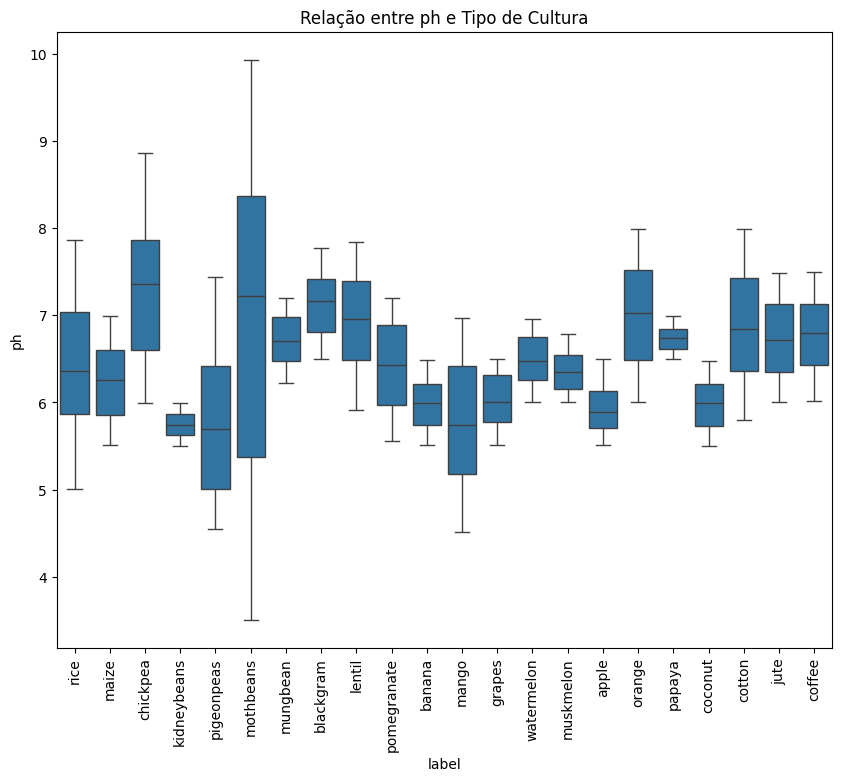

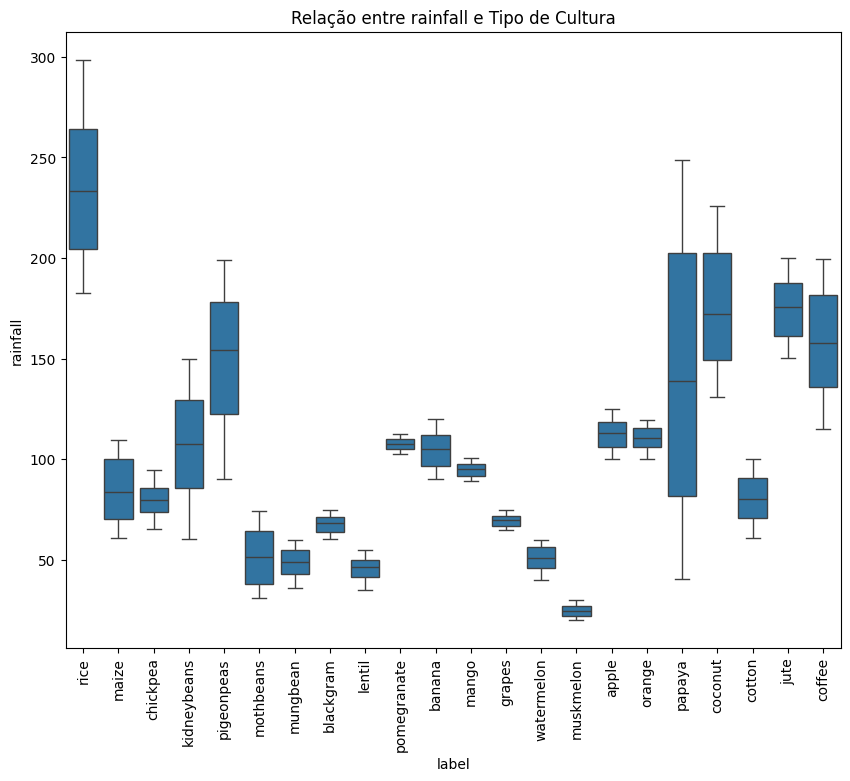

In [10]:
for col in ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']:
    plt.figure(figsize=(10, 8))
    sns.boxplot(x='label', y=col, data=data)
    plt.title(f'Relação entre {col} e Tipo de Cultura')
    plt.xticks(rotation=90)
    plt.show()

**Cálculo do Perfil Ideal de Solo e Clima para Cada Cultura**

Calculamos médias e medianas dos parâmetros de solo e clima para cada tipo de cultura, buscando entender o perfil ideal para cada uma

In [11]:
ideal_profile_culture = data.groupby('label').agg({
    'N': ['mean', 'median'],
    'P': ['mean', 'median'],
    'K': ['mean', 'median'],
    'temperature': ['mean', 'median'],
    'humidity': ['mean', 'median'],
    'ph': ['mean', 'median'],
    'rainfall': ['mean', 'median']
}).reset_index()

print("\nPerfil ideal de solo e clima para cada cultura:")
print(ideal_profile_culture)


Perfil ideal de solo e clima para cada cultura:
          label       N              P              K        temperature  \
                   mean median    mean median    mean median        mean   
0         apple   20.80   24.0  134.22  136.5  199.89  200.0   22.630942   
1        banana  100.23  100.5   82.01   81.0   50.05   50.0   27.376798   
2     blackgram   40.02   41.0   67.47   67.0   19.24   19.0   29.973340   
3      chickpea   40.09   39.0   67.79   68.0   79.92   79.0   18.872847   
4       coconut   21.98   24.0   16.93   15.5   30.59   31.0   27.409892   
5        coffee  101.20  103.0   28.74   29.0   29.94   30.0   25.540477   
6        cotton  117.77  117.0   46.24   46.0   19.56   19.0   23.988958   
7        grapes   23.18   24.0  132.53  133.0  200.11  201.0   23.849575   
8          jute   78.40   78.0   46.86   46.0   39.99   40.0   24.958376   
9   kidneybeans   20.75   22.0   67.54   67.0   20.05   20.0   20.115085   
10       lentil   18.77   16.5   68.36 

**Cálculo do Perfil Ideal para Cada Fertilizante**

Calculamos o perfil de nutrientes e condições ideais de solo para diferentes fertilizantes, organizando médias e medianas

In [12]:
ideal_profile_fertilizer = fertilizer_data.groupby('Fertilizer Name').agg({
    'Nitrogen': ['mean', 'median'],
    'Phosphorous': ['mean', 'median'],
    'Potassium': ['mean', 'median'],
    'Temperature': ['mean', 'median'],
    'Humidity ': ['mean', 'median'],
    'Moisture': ['mean', 'median']
}).reset_index()

print("\nPerfil ideal para cada fertilizante:")
print(ideal_profile_fertilizer)


Perfil ideal para cada fertilizante:
  Fertilizer Name   Nitrogen        Phosphorous         Potassium         \
                        mean median        mean median       mean median   
0        10-26-26   7.571429    6.0   17.714286   17.0  17.714286   18.0   
1        14-35-14   8.214286    8.0   29.571429   30.0   8.571429    9.0   
2        17-17-17  12.142857   12.0   13.142857   13.0  13.000000   13.0   
3           20-20  11.214286   11.5   11.571429   11.5   0.000000    0.0   
4           28-28  22.647059   23.0   21.058824   20.0   0.000000    0.0   
5             DAP  12.944444   13.0   38.444444   38.5   0.000000    0.0   
6            Urea  38.363636   38.5    0.000000    0.0   0.000000    0.0   

  Temperature         Humidity           Moisture         
         mean median       mean median       mean median  
0   29.714286   29.0  58.142857   58.0  39.285714   40.0  
1   31.357143   30.0  61.142857   60.0  45.214286   45.5  
2   29.000000   31.0  57.571429   62.0  4

**Preparação dos Dados para Modelagem**

Separação das variáveis de entrada (X) e a variável alvo (y), seguida do escalonamento dos dados.

In [13]:
X = data.drop('label', axis=1)
y = data['label']

**Escalonamento dos dados usando StandardScaler para melhor desempenho dos modelos**


In [14]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

**Separação dos dados em conjuntos de treino e teste**

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


**Treinamento e Avaliação dos Modelos**

Usamos cinco modelos diferentes de Machine Learning para comparar o desempenho com base na acurácia

In [16]:
modelos = {
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Support Vector Machine": SVC(),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42)
}

**Loop para treinar e avaliar cada modelo**

In [17]:
for nome, modelo in modelos.items():
    print(f"\nTreinando o modelo: {nome}")
    modelo.fit(X_train, y_train)
    y_pred = modelo.predict(X_test)
    print(f"Acurácia de {nome}: {accuracy_score(y_test, y_pred):.2f}")
    print(classification_report(y_test, y_pred))



Treinando o modelo: K-Nearest Neighbors
Acurácia de K-Nearest Neighbors: 0.96
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        23
      banana       1.00      1.00      1.00        21
   blackgram       0.95      0.95      0.95        20
    chickpea       1.00      1.00      1.00        26
     coconut       1.00      1.00      1.00        27
      coffee       0.94      1.00      0.97        17
      cotton       0.89      1.00      0.94        17
      grapes       1.00      1.00      1.00        14
        jute       0.81      0.96      0.88        23
 kidneybeans       0.91      1.00      0.95        20
      lentil       0.69      1.00      0.81        11
       maize       1.00      0.90      0.95        21
       mango       0.90      1.00      0.95        19
   mothbeans       1.00      0.83      0.91        24
    mungbean       1.00      1.00      1.00        19
   muskmelon       1.00      1.00      1.00        17
  

**Otimização de Hiperparâmetros para o Modelo RandomForest**
Utilizamos GridSearchCV para buscar os melhores hiperparâmetros para o modelo RandomForest

In [18]:
param_grid = {'n_estimators': [50, 100, 200], 'max_depth': [10, 20, 30]}
grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5)
grid_search.fit(X_train, y_train)

print("Melhores hiperparâmetros para RandomForest:", grid_search.best_params_)


Melhores hiperparâmetros para RandomForest: {'max_depth': 20, 'n_estimators': 100}


**Conclusão**

Com base nas análises realizadas, identificamos perfis ideais de solo e clima para diferentes culturas, além de explorarmos as variáveis ambientais que afetam essas culturas. A aplicação de modelos de machine learning foi eficaz para prever o tipo de cultura com base nas condições do solo e clima.

Além disso, a otimização de hiperparâmetros para Random Forest revelou um desempenho superior, proporcionando melhores resultados de classificação.